In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from eda_rinus import timechange, features, features_aggr, counting_mood_days
from sklearn import preprocessing
import numpy as np


# read csv file
sdf = pd.read_csv('data/dataset_mood_smartphone.csv', index_col=0)

# drop rows where there's no number in column named 'value'
# sdf.dropna()

# Example of filtering mood values being non-negative
# sdf_mood = sdf.loc[(sdf['variable'] == 'mood')]
# index_neg = sdf_mood[sdf_mood['value'] < 0].index
# sdf_mood.drop(index_neg, inplace=True)
# display(sdf_mood)

# Normalizing the Mood DF
# mood = sdf.values
# min_max_scaler = preprocessing.MinMaxScaler()
# mood_scaled = min_max_scaler.fit_transform(mood)
# sdf = pd.DataFrame(mood_scaled)
# display(sdf)

# retrieve index for which column named 'value' is negative
# index_neg = sdf[sdf['value'] < 0].index

# drop those indexes
# sdf.drop(index_neg, inplace=True)

display(sdf)

,id,time,variable,value
1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [2]:
sdf = timechange(sdf)
display(sdf)



,id,time,variable,value,hour
1,AS14.01,2014-02-26,mood,6.000,13
2,AS14.01,2014-02-26,mood,6.000,15
3,AS14.01,2014-02-26,mood,6.000,18
4,AS14.01,2014-02-26,mood,7.000,21
5,AS14.01,2014-02-27,mood,6.000,9
...,...,...,...,...,...
2770399,AS14.30,2014-04-11,appCat.weather,8.032,7
2772465,AS14.30,2014-04-19,appCat.weather,3.008,11
2774026,AS14.30,2014-04-26,appCat.weather,7.026,10
2774133,AS14.30,2014-04-27,appCat.weather,23.033,0


In [3]:
print("features (not combined)")
print(features(sdf))

features (not combined)
                        count    mean     std       min    25%    50%     75%  \
variable                                                                        
mood                   5641.0    6.99    1.03      1.00   7.00   7.00    8.00   
circumplex.arousal     5597.0   -0.10    1.05     -2.00  -1.00   0.00    1.00   
circumplex.valence     5487.0    0.69    0.67     -2.00   0.00   1.00    1.00   
activity              22965.0    0.12    0.19      0.00   0.00   0.02    0.16   
screen                96578.0   75.34  253.82      0.04   5.32  20.04   62.54   
call                   5239.0    1.00    0.00      1.00   1.00   1.00    1.00   
sms                    1798.0    1.00    0.00      1.00   1.00   1.00    1.00   
appCat.builtin        91288.0   18.54  415.99 -82798.87   2.02   4.04    9.92   
appCat.communication  74276.0   43.34  128.91      0.01   5.22  16.23   45.48   
appCat.entertainment  27125.0   37.58  262.96     -0.01   1.33   3.39   14.92   
appC

In [4]:
print("features (combined)")
print(features_aggr(sdf, aggr_features=True))


features (combined)
                      count   mean     std       min   25%    50%    75%  \
variable                                                                   
mood                 5641.0   6.99    1.03      1.00  7.00   7.00   8.00   
circumplex.values   11084.0   0.29    0.97     -2.00  0.00   1.00   1.00   
activity            22965.0   0.12    0.19      0.00  0.00   0.02   0.16   
screen              96578.0  75.34  253.82      0.04  5.32  20.04  62.54   
call                 5239.0   1.00    0.00      1.00  1.00   1.00   1.00   
sms                  1798.0   1.00    0.00      1.00  1.00   1.00   1.00   
appCat.values      233405.0  34.24  305.64 -82798.87  3.01   7.04  25.50   

                        max  trimmed mean  
variable                                   
mood                  10.00      7.033090  
circumplex.values      2.00      0.355779  
activity               1.00      0.090174  
screen              9867.01     41.731878  
call                   1.00    

In [5]:
# calculate average value per variable per day
display(sdf.groupby(['id', 'time', 'variable'])['value'].mean().to_frame().reset_index())
# test = sdf.groupby(['id', 'time', 'variable'])['value'].mean()
# test = test.to_frame().reset_index()
# display(test)


# from scipy import stats
# test = sdf.groupby(['id', 'time', 'variable'])['value'].mean()
# # test = stats.trim_mean(sdf.groupby(['id', 'time', 'variable'])['value'], 0.1)
# # test = test.to_frame().reset_index()
# display(test)
# # stats.trim_mean(data, 0.1)


,id,time,variable,value
0,AS14.01,2014-02-17,call,1.000000
1,AS14.01,2014-02-18,call,1.000000
2,AS14.01,2014-02-19,call,1.000000
3,AS14.01,2014-02-19,sms,1.000000
4,AS14.01,2014-02-20,call,1.000000
...,...,...,...,...
8207,AS14.33,2014-05-30,circumplex.values,-0.600000
8208,AS14.33,2014-05-30,mood,6.800000
8209,AS14.33,2014-05-30,screen,86.342245
8210,AS14.33,2014-05-31,circumplex.values,-0.500000


In [6]:
mood_days, moodless_days = counting_mood_days(sdf)

print("mood_days: ")
print(mood_days)
print("moodless_days: ")
print(moodless_days)





mood_days: 
[{'AS14.01': 222}, {'AS14.02': 159}, {'AS14.03': 221}, {'AS14.05': 241}, {'AS14.06': 203}, {'AS14.07': 192}, {'AS14.08': 299}, {'AS14.09': 197}, {'AS14.12': 185}, {'AS14.13': 244}, {'AS14.14': 164}, {'AS14.15': 269}, {'AS14.16': 231}, {'AS14.17': 237}, {'AS14.19': 221}, {'AS14.20': 202}, {'AS14.23': 159}, {'AS14.24': 238}, {'AS14.25': 131}, {'AS14.26': 329}, {'AS14.27': 199}, {'AS14.28': 169}, {'AS14.29': 187}, {'AS14.30': 224}, {'AS14.31': 198}, {'AS14.32': 128}, {'AS14.33': 192}]
moodless_days: 
[{'AS14.01': 21777}, {'AS14.02': 14422}, {'AS14.03': 14204}, {'AS14.05': 15504}, {'AS14.06': 17889}, {'AS14.07': 15853}, {'AS14.08': 7603}, {'AS14.09': 10689}, {'AS14.12': 17126}, {'AS14.13': 19348}, {'AS14.14': 9122}, {'AS14.15': 2579}, {'AS14.16': 3751}, {'AS14.17': 15589}, {'AS14.19': 11176}, {'AS14.20': 3418}, {'AS14.23': 21693}, {'AS14.24': 14192}, {'AS14.25': 12458}, {'AS14.26': 16074}, {'AS14.27': 14376}, {'AS14.28': 19107}, {'AS14.29': 17312}, {'AS14.30': 17055}, {'AS14.31

In [7]:
# make a dict of all variables that are in the csv file
# features = retrieve_dict()

# calculate average value per variable per day and keep only one per variable per day left
new_sdf = sdf.groupby(['id', 'time', 'variable'])['value'].mean().to_frame().reset_index()

# transform sdf to a pivot table --> this lines up the distinct variables into columns instead of rows
# based on: https://pandas.pydata.org/docs/user_guide/reshaping.html
sdf_pivot = new_sdf.pivot(index=['id', 'time'], columns=['variable'], values=['value'])
sdf_pivot.columns = sdf_pivot.columns.droplevel(0)
# tranform pivot table back into a dataframe to make it easier to work with
organised_sdf = sdf_pivot.reset_index().rename_axis(None, axis=1)
display(organised_sdf)





,id,time,activity,appCat.values,call,circumplex.values,mood,screen,sms
0,AS14.01,2014-02-17,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-18,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-19,NaN,NaN,1.0,NaN,NaN,NaN,1.0
3,AS14.01,2014-02-20,NaN,NaN,1.0,NaN,NaN,NaN,1.0
4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.012704,29.703532,1.0,-0.100000,6.2,113.607750,1.0
1969,AS14.33,2014-05-28,0.103301,27.164437,1.0,0.600000,8.2,113.657683,1.0
1970,AS14.33,2014-05-29,0.169354,32.128034,1.0,-0.166667,7.0,118.978033,1.0
1971,AS14.33,2014-05-30,0.192901,27.741684,1.0,-0.600000,6.8,86.342245,NaN


In [8]:
organised_sdf.isnull().sum()



id                      0
time                    0
activity              785
appCat.values         764
call                  635
circumplex.values     705
mood                  705
screen                766
sms                  1239
dtype: int64

In [9]:
# make list to save values to create a new df with
data = []
# retrieve days with and without mood per user
for users in organised_sdf.id.unique():
    user_rows = organised_sdf.loc[organised_sdf.id == users]

    mood_days = 0
    # mood_days_list = []
    moodless_days = 0
    # moodless_days_list = []

    for i, day in user_rows.iterrows():
        if np.isnan(day.mood):
            moodless_days += 1
        else:
            mood_days += 1
    data.append([users[0:], mood_days, moodless_days])
    print(f"User {users[0:]} has got {mood_days} mood_days and {moodless_days} moodless_days")
# create new df
mood_df = pd.DataFrame(data, columns = ['ID', 'Mood', 'Moodless'])

display(mood_df)

User AS14.01 has got 47 mood_days and 25 moodless_days
User AS14.02 has got 41 mood_days and 27 moodless_days
User AS14.03 has got 47 mood_days and 30 moodless_days
User AS14.05 has got 53 mood_days and 17 moodless_days
User AS14.06 has got 45 mood_days and 29 moodless_days
User AS14.07 has got 48 mood_days and 2 moodless_days
User AS14.08 has got 62 mood_days and 5 moodless_days
User AS14.09 has got 46 mood_days and 25 moodless_days
User AS14.12 has got 41 mood_days and 26 moodless_days
User AS14.13 has got 53 mood_days and 19 moodless_days
User AS14.14 has got 44 mood_days and 28 moodless_days
User AS14.15 has got 55 mood_days and 24 moodless_days
User AS14.16 has got 53 mood_days and 21 moodless_days
User AS14.17 has got 56 mood_days and 19 moodless_days
User AS14.19 has got 46 mood_days and 27 moodless_days
User AS14.20 has got 47 mood_days and 19 moodless_days
User AS14.23 has got 39 mood_days and 24 moodless_days
User AS14.24 has got 55 mood_days and 7 moodless_days
User AS14.25 

,ID,Mood,Moodless
0,AS14.01,47,25
1,AS14.02,41,27
2,AS14.03,47,30
3,AS14.05,53,17
4,AS14.06,45,29
5,AS14.07,48,2
6,AS14.08,62,5
7,AS14.09,46,25
8,AS14.12,41,26
9,AS14.13,53,19


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'AS14.01'),
  Text(1, 0, 'AS14.02'),
  Text(2, 0, 'AS14.03'),
  Text(3, 0, 'AS14.05'),
  Text(4, 0, 'AS14.06'),
  Text(5, 0, 'AS14.07'),
  Text(6, 0, 'AS14.08'),
  Text(7, 0, 'AS14.09'),
  Text(8, 0, 'AS14.12'),
  Text(9, 0, 'AS14.13'),
  Text(10, 0, 'AS14.14'),
  Text(11, 0, 'AS14.15'),
  Text(12, 0, 'AS14.16'),
  Text(13, 0, 'AS14.17'),
  Text(14, 0, 'AS14.19'),
  Text(15, 0, 'AS14.20'),
  Text(16, 0, 'AS14.23'),
  Text(17, 0, 'AS14.24'),
  Text(18, 0, 'AS14.25'),
  Text(19, 0, 'AS14.26'),
  Text(20, 0, 'AS14.27'),
  Text(21, 0, 'AS14.28'),
  Text(22, 0, 'AS14.29'),
  Text(23, 0, 'AS14.30'),
  Text(24, 0, 'AS14.31'),
  Text(25, 0, 'AS14.32'),
  Text(26, 0, 'AS14.33')])

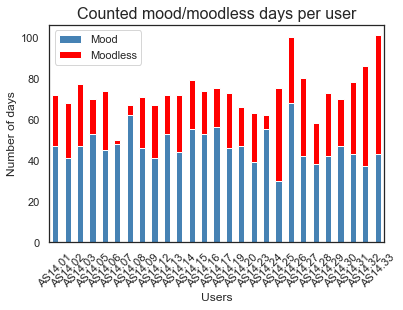

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
mood_df.set_index('ID').plot(kind='bar', stacked=True, color=['steelblue', 'red'])

# set figure size
# plt.figure(figsize=(20,5))

#add overall title
plt.title('Counted mood/moodless days per user', fontsize=16)

#add axis titles
plt.xlabel('Users')
plt.ylabel('Number of days')

#rotate x-axis labels
plt.xticks(rotation=45)

In [11]:
lgbm_data = organised_sdf
lgbm_data = lgbm_data.drop('id', axis=1).set_index('time')
display(lgbm_data)

,activity,appCat.values,call,circumplex.values,mood,screen,sms
time,,,,,,,
2014-02-17,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2014-02-18,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2014-02-19,NaN,NaN,1.0,NaN,NaN,NaN,1.0
2014-02-20,NaN,NaN,1.0,NaN,NaN,NaN,1.0
2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...
2014-05-27,0.012704,29.703532,1.0,-0.100000,6.2,113.607750,1.0
2014-05-28,0.103301,27.164437,1.0,0.600000,8.2,113.657683,1.0
2014-05-29,0.169354,32.128034,1.0,-0.166667,7.0,118.978033,1.0


In [12]:
# impute missing values based on previous day
# heavily inspired by: https://www.analyticsvidhya.com/blog/2020/10/multivariate-multi-step-time-series-forecasting-using-stacked-lstm-sequence-to-sequence-autoencoder-in-tensorflow-2-0-keras/
def fill_missing(values):
    one_day = 60*24
    for row in range(df.shape[0]):
        for col in range(df.shape[1]):
            if np.isnan(values[row][col]):
                values[row,col] = values[row-one_day,col]
df = lgbm_data.astype('float32')
fill_missing(df.values)
df = df.fillna(0)
print(df.isnull().sum())
df.to_csv('data/testtest3.csv')

activity             0
appCat.values        0
call                 0
circumplex.values    0
mood                 0
screen               0
sms                  0
dtype: int64


<AxesSubplot:>

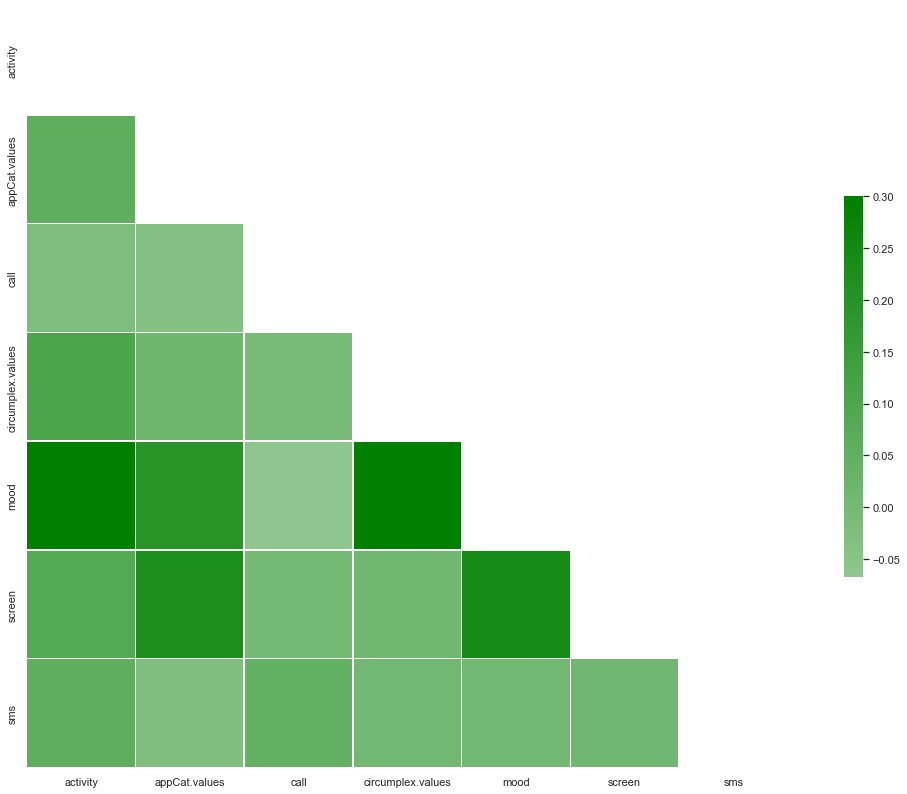

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# set NaN values for columns sms and call to 0 
# organised_sdf[['sms', 'call']] = organised_sdf[['sms', 'call']].fillna(value=0)

df = df.reset_index()

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,14))

# Generate a custom diverging colormap
# cmap = sns.palplot(sns.light_palette((210, 90, 60), input="husl"))
cmap = sns.light_palette("green", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



,activity,appCat.values,call,circumplex.values,mood,screen,sms
time,,,,,,,
2014-02-17,0.041548,21.900333,1.0,0.125000,6.250000,22.162157,0.0
2014-02-18,0.015309,22.311789,1.0,-0.142857,6.500000,56.542267,0.0
2014-02-19,0.064394,37.849680,1.0,0.100000,6.600000,137.494630,1.0
2014-02-20,0.039220,38.048714,1.0,0.000000,6.333334,117.011760,1.0
2014-02-21,0.042033,12.750950,1.0,0.600000,7.200000,33.210304,1.0
...,...,...,...,...,...,...,...
2014-05-27,0.012704,29.703531,1.0,-0.100000,6.200000,113.607750,1.0
2014-05-28,0.103301,27.164436,1.0,0.600000,8.200000,113.657684,1.0
2014-05-29,0.169354,32.128033,1.0,-0.166667,7.000000,118.978035,1.0


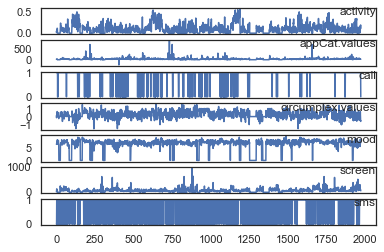

In [14]:
from pandas import read_csv

dataset = read_csv('data/testtest3.csv', header=0, index_col=0)
display(dataset)
values = dataset.values

# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
    # pyplot.figure(figsize=(1,1))
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
import lightgbm as lgbm

dataset = read_csv('data/testtest3.csv', header=0)

# train, test = train_test_split(dataset, test_size=0.2, random_state=25)

features_train = ['activity', 'appCat.values', 'call', 'circumplex.values', 'screen', 'sms']
target_train = 'mood'

X_train, X_val, y_train, y_val = train_test_split(
    dataset[features_train], dataset[target_train], test_size=0.2)

train_data = lgbm.Dataset(X_train, label=y_train)

test_data = lgbm.Dataset(X_val, label=y_val)

/Users/rinusvangrunsven/opt/anaconda3/envs/dspa2/lib/python3.6/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000974 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 35.0973
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 35.112
[3]	valid_0's l2: 35.0838
[4]	valid_0's l2: 35.094
[5]	valid_0's l2: 35.0896
[6]	valid_0's l2: 35.0912
[7]	valid_0's l2: 35.0532
[8]	valid_0's l2: 35.0504
[9]	valid_0's l2: 35.0418
[10]	valid_0's l2: 35.006
[LightGBM] [Warning] No

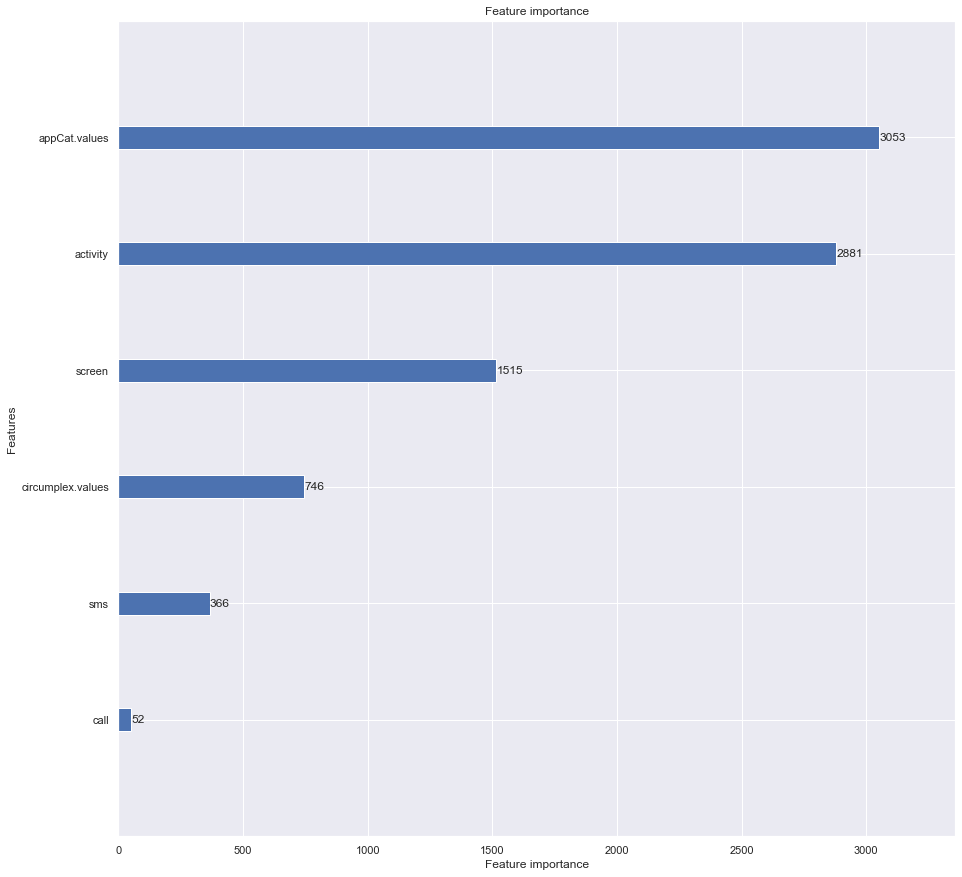

In [16]:
# determine style
sns.set_theme(style="darkgrid")

#basic parameter:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'mse',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 25,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

# determine model
model = lgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=1000,
                       early_stopping_rounds=100)

# plot and show feature importance
ax = lgbm.plot_importance(model, max_num_features=40, figsize=(15, 15))
plt.show()

In [17]:
hyper_params = {
    'random_state': 420,
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['mse'],
    'learning_rate': 0.1,
    "num_leaves": 256,
    'max_depth': 9,
    # 'min_data_in_leaf': 70,
    # "max_bin": 512,
}

train_data = lgbm.Dataset(X_train, label=y_train, categorical_feature='auto')
test_data = lgbm.Dataset(X_val, label=y_val, categorical_feature='auto')

model = lgbm.train(hyper_params, train_data, num_boost_round=500, verbose_eval=False)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 826
[LightGBM] [Info] Number of data points in the train set: 1578, number of used features: 6
[LightGBM] [Info] Start training from score 6.313741
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [18]:
import pickle

# save
with open('models/LGBM_MSE.pkl','wb') as f:
    pickle.dump(model,f)

In [19]:
y_pred = model.predict(X_val[features_train])

predictions = pd.DataFrame({'predicted': y_pred, 'actual': y_val})

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


mse = mean_squared_error(predictions['actual'], predictions['predicted'])
mae = mean_absolute_error(predictions['actual'], predictions['predicted'])

print(f"MSE is: {mse}")
print(f"MAE is: {mae}")



MSE is: 1.1397626377282315
MAE is: 0.5949999548857979


Tried to make a LSTM-model; is not working yet, unfortunately

In [21]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split

 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# for col in test_sdf.columns:
#     if col not in ['time', 'mood', 'sms', 'cal']:
#         scaler = MinMaxScaler(feature_range=(0, 1))
#         df_var = np.array(test_sdf[col]).reshape(-1, 1)
#         normalized = scaler.fit_transform(df_var)
#         test_sdf[col] = normalized

# load dataset
dataset = read_csv('testtest2.csv', header=0, index_col=0)
dataset = dataset.fillna(0)

# testrinus.index.name = 'id', 'time'
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, -1, 1)
# drop columns we don't want to predict
# reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())
 
# split into train and test sets
values = reframed.values
# n_train_hours = 365 * 24
train = values[:values, :]
test = values[values:, :]

# train, test = train_test_split(values, test_size=0.2, random_state=25)

#     if col not in ['time', 'mood', 'sms', 'cal']:
#         scaler = MinMaxScaler(feature_range=(0, 1))
#         df_var = np.array(test_sdf[col]).reshape(-1, 1)
#         normalized = scaler.fit_transform(df_var)
#         test_sdf[col] = normalized

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

    var1(t)   var2(t)  var3(t)   var4(t)   var5(t)   var6(t)  var7(t)
0  0.073385  0.238342      1.0  0.541667  0.440678  0.023073      0.0
1  0.027040  0.238700      1.0  0.452381  0.491525  0.058867      0.0
2  0.113736  0.252198      1.0  0.533333  0.508475  0.143149      1.0
3  0.069273  0.252371      1.0  0.500000  0.457627  0.121823      1.0
4  0.074241  0.230394      0.0  0.700000  0.627119  0.034576      1.0


TypeError: only integer scalar arrays can be converted to a scalar index